# 뉴럴 네트워크 (NN) - MNIST

Date: 2019-8-30  
Author: skettee  
Categories: Deep Learning, Neural Network  
Tags: 딥러닝, 뉴럴 네트워크, 훈련 세트, 테스트 세트, MNIST, ReLU, Adam  
<!--eofm-->


뉴럴 네트워크(NN) 실전 문제! MNIST를 keras를 이용해서 모델링을 해보자!
<!--more-->

실제로 돌려 보고 싶으면 구글 코랩으로 ~  

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/skettee/notebooks/blob/master/neural_network_mnist.ipynb)

## 문제 (Problem)

👤 상사

> 요즘 일이 없지?  
> 아래 사이트에 가면  'MNIST database of handwritten digits' 데이터 세트에 대한 설명이 있네  
> https://keras.io/datasets/  
> 여기서 제공하는 MNIST 데이터 세트로 훈련해서  
> 손으로 쓴 숫자를 인식하는 프로그램을 만들어 보게  
> 업무에 도움이 될 듯  

⚙️ 엔지니어

> 넵~  
> 
> (혼잣말) MNIST? 뭔 말인지 모르것다.. 일단 설명을 보자

0에서 9까지 손으로 쓴 숫자 이미지 데이터 세트를 MNIST dataset이라고 한다.  

이미지(x)는 크기가 가로 28, 세로 28이며 그레이 스케일(0 ~ 255사이의 값)로 되어 있다.  
정답지(y)는 0 ~ 9사이의 정수로 되어 있다.  
훈련을 위한 60,000개의 데이터 세트(x, y)와   
테스트를 위한 10,000개의 데이터 세트(x, y)가 있다.    

⚙️ 엔지니어

> 지금까지 학습한 모델링 지식을 가지고   
> 숫자를 인식하는 NN 모델을 만들고   
> 훈련과 테스트를 통해서  
> 정확도를 계산하면   
> 되겠군   


In [1]:
%matplotlib inline
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# train_images, test_images: uint8 array of grayscale image data with shape (num_samples, 28, 28)
# train_labels, test_labels: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## 데이터 분석 (Data Analysis)

⚙️ 엔지니어

> 지금까지 본 문제와는 사이즈가 다르다!  
> 우선 훈련 세트와 테스트 세트에 대해서  
> 알아 보자  

### 훈련 세트와 테스트 세트 (Train and Test set)

⚙️ 엔지니어

> 우리가 만든 모델을 훈련 시킬때 사용하는 데이터가  
> **훈련 세트 (Train set)**  
>
> 훈련을 마친 모델에 대해서  
> 성능을 확인하기 위해 사용하는 데이터가  
> **테스트 세트 (Test set)**  
>
> 훈련 세트는 학교 수업이고  
> 테스트 세트는 모의 고사라고 생각하면 된다.   

### 데이터 확인 (Data Visualization)

⚙️ 엔지니어

> 설명만 들어서는 어떻게 모델링을 해야 할지  
> 감이 오지 않는다.  
> 데이터를 눈으로 확인해 보자  

**입력(x) 데이터 확인**

In [2]:
# 모양 (shape) 확인
print('train_images shape is ', train_images.shape)

train_images shape is  (60000, 28, 28)


⚙️ 엔지니어

> keras가 좋아하는 모양으로 되어 있다.  
> (batch_size, input_dimension) 기억하는가?  
> batch_size = 60000  
> imput_dimension = 784 (28X28)   
>
> 2D라고 쫄지말자...  
> x-y 그래프에서 점을 찍는데 점 색깔이 회색조로 256개가 있다고 생각하면 된다.   
> 0은 검정색, 255는 흰색이다.  
> 그리고 점을 **픽셀(pixel)** 이라고 한다.  
>
> 아래 그림을 보자  

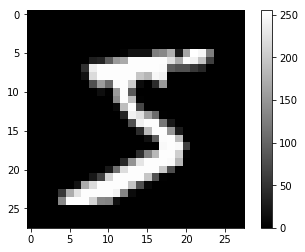

In [3]:
# 이미지 (image) 확인
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.show()

**출력(y) 데이터 확인**

⚙️ 엔지니어

> batch_size = 60000   
> imput_dimension = 1   
> 0에서 9까지 10개의 클래스(Class)로 분류하면 된다.  
>
> 참고로 위의 이미지에 대한 y값은 5다.  

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

⚙️ 엔지니어

> 이미지의 픽셀값 784(28X28)개를 입력 변수(x)로     
> 숫자값 (0~9) 10개를 출력 변수 (y)로  
>  뉴럴 네트워크(NN)로 모델링을 하면 될것 같다.  


## 데이터 변환 (Data Transformation)

⚙️ 엔지니어

> 입력 데이터의 shape (28,28)를 (784, )로 변환해 주어야 한다.  
> 이 작업은 keras layer에서 처리해 주면 된다. (나중에 하겠다는 얘기다.)  
> 
> 소프트맥스(Softmax)를 사용할 예정이니까  
> 출력 데이터를 원-핫 인코딩으로 변환해 주자

In [5]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(train_labels) # one-hot encoding
Y_test = to_categorical(test_labels)
print('Y_train.shape is ', Y_train.shape)
print('one-hot encoded first Y_train is ', Y_train[0])

Y_train.shape is  (60000, 10)
one-hot encoded first Y_train is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 모델링 (Modeling)

⚙️ 엔지니어

> 일단, 2-layer NN 모델로 진행해 보자    
>
> 일단이라고 말한 이유는  
> 정답이 없기 때문이다.  
>
> input layer는 2D(28X28)를 1D로 변환해서 784개의 x로 만든다.  
>
> hidden layer는 128-unit으로 구성하자  
> 왜냐고?  
> 이유는 없다.  다른 예제에서 128-unit으로 하더라...
>
> output layer는 당연히 10-unit으로 구성, softmax를 activation function으로 사용한다.  
> loss는 cross-entropy loss를 사용  
>
> 남은것은  
> hidden layer의 activation function과  
> optimizer를 선택하는 것이다.  
>
> 오늘,  
> 새로운 것들을 소개 하겠다.    
> hidden layer의 activation function의 정석 **ReLU**,   
> optimizer의 끝판왕인 **Adam**  

### ReLU (Rectified Linear Unit)

$a=max(0,z)$

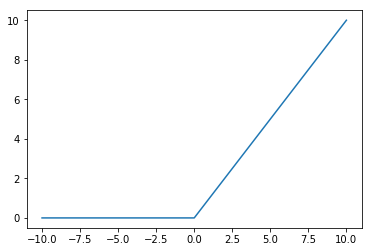

In [6]:
def relu(x):
    return max(0, x)

x_list = [x for x in range(-10, 11)]
y_list = [relu(x) for x in x_list]

plt.plot(x_list, y_list)
plt.show()

시그모이드의 단점은  hidden layer가 많아 질 수록 학습이 안되는 문제가 있다. 미분의 미분의 미분의 ... 미분을 하다 보면 미분값이 0에 가깝게 된다. 이러면 손실 함수의 최소값을 찾기 위해 $w$와 $b$를 움직이지 못한다.  이러한 단점을 보완하기 위해서 탄생한 것이 렐루(ReLU) 함수이다. 물론 엔지니어를 갈아서 만들었다...  

⚙️ 엔지니어

> 수학에 정석이 있듯이 hidden layer에는 ReLU가 있다.  
> 기냥 쓰자  


### Adam

**모멘텀(Momentum)**  

주식 좀 한다는 사람들은 '지수이동평균'에 대해서 잘 알고 있을 것이다.  
상하로 진동하는 주식 그래프를 지수 이동 평균을 계산하면 부드러운 곡선으로 표시되고 상승 혹은 하강 추세를 쉽게 확인 할 수 있다.  

경사하강법(Gradient Descent)의 단점은 손실 함수의 최소값을 찾아가는 과정이 주식 그래프 처럼 진동이 심하다는 것이다. 따라서 경사하강법에 '지수이동평균'을 적용해서 **부드럽게** 손실 함수의 최소값을 찾아가는 방법을 모멘텀(Gradient Descent with momentum) 이라고 한다.  

$dw = {\partial {J(w,b)}\over \partial w}$,  
$db = {\partial{J(w,b)}\over \partial b}$  

REPEAT(epoch) {    
$w:=w-\alpha {V_{dw}}$      

$b:=b-\alpha {V_{db}}$   
}  
 
$V_{dw} = \beta_1 V_{dw} + (1-\beta_1 )dw$,  
$V_{db} = \beta_1 V_{db} + (1-\beta_1 )db$  

$\alpha =0.001$ : learining rate,  
$\beta_1 = 0.9$ : exponential decay rate  

**RMSProp**  

급경사인 경우에는 보폭을 낮추어서 가장 아래인지를 세밀히 살피고, 완만한 경사인 경우에는 보폭을 넓혀서 빨리 지나가는 방식이다.  
이 방식은 **빠르게** 손실 함수의 최소값을 찾을 수 있다.  

REPEAT(epoch) {    
$w:=w-\alpha {dw \over {\sqrt {S_{dw}} + \epsilon}}$      

$b:=b-\alpha {db \over {\sqrt {S_{db}} + \epsilon}}$   
}  
 
$S_{dw} = \beta_2 S_{dw} + (1-\beta_2)dw^2$,  
$S_{db} = \beta_2 S_{db} + (1-\beta_2)db^2$  

$\beta_2 = 0.999$ : discounting factor,   
$\epsilon = 1e-07$ : small value to avoid zero denominator  

**Adam**  

앞의 Momentum과 RMSProp을 합친것이 Adam이다.   
**빠르고 부드럽게** 최소값을 찾아 간다.   

REPEAT(epoch) {    
$w:=w-\alpha {V_{dw} \over {\sqrt {S_{dw}} + \epsilon}}$      

$b:=b-\alpha {V_{db} \over {\sqrt {S_{db}} + \epsilon}}$   
}  

⚙️ 엔지니어

> 좋은 것을 모두 합쳐 놓았으니 성능이 좋을 수 밖에   
> 닥치고 Adam 쓰자    

### 정리  

⚙️ 엔지니어

> NN을 이용한 MNIST 인식 모델을 만드는 방법을 정리해 보자.  
> 1. 데이터를 변환한다.    
>   1. 입력 데이터의 형식과 모양을 변환한다. 2D를 1D로 변환한다.  
>   2. 출력 데이터의 형식과 모양을 변환한다. **원-핫 인코딩(one-hot encoding)** 을 사용한다.  
> 2. **히든 레이어(hidden layer)**  정의  
>   1. 히든 레이어 개수를 정의한다. 여기서는 1-hidden layer를 사용한다.  
>   2. 히든 레이어 유닛 개수를 정의한다. 여기서는 128개이 유닛을 사용한다.  
>   3. 활성 함수(activation function)를 정의한다. 여기서는 **ReLU** 를 사용한다.  
> 3. **출력 레이어(output layer)**  정의   
>   1. 출력 레이어 유닛 개수를 정의한다. 여기서는 10개의 클래스로 분류해야 되니까 10개의 유닛을 사용한다.  
>   2. 활성 함수(activation function)를 정의한다. **소프트맥스(softmax)** 를 사용한다.
> 4. 손실 함수 (Loss function)를 정의한다. **크로스-엔트로피 손실(cross-entropy loss)** 를 사용한다.  
> 5. 옵티마이저(Optimizer)를 정의한다. 여기서는 **Adam** 을 사용한다.  
> 4. 반복할 회수(epoch)를 결정한다.  
> 5. 주어진 조건으로 모델을 최적화(fit) 시킨다.  

## 텐서플로우(Tensorflow)로 모델링(Modeling)

⚙️ 엔지니어

> **케라스(Keras)**를 이용해서 구현을 해보자!

### 정규화 (Normalization)

⚙️ 엔지니어  

> **정규값 = (현재값 - 최소값) / (최대값-최소값)** 으로 정규화 한다!  
> 최소값이 0이고,  
> 최대값이 255이니까    
> 현재값에서 /255 를 해 주면 된다. 

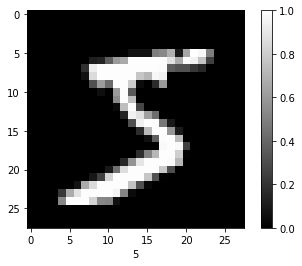

In [7]:
X_train = train_images / 255.0
X_test = test_images / 255.0

plt.imshow(X_train[0], cmap='gray')
plt.colorbar()
plt.xlabel(np.argmax(Y_train[0]))
plt.show()

### Keras를 가지고 모델링(Modeling)하기

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0831 11:08:29.792055 140361191307072 deprecation.py:506] From /home/dataman/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### 모델 훈련

In [9]:
hist = model.fit(X_train, Y_train, epochs=10, verbose=0)

print('최종 훈련 정확도: ', hist.history['acc'][-1])
print('최종 훈련 손실율: ', hist.history['loss'][-1])

최종 훈련 정확도:  0.99535
최종 훈련 손실율:  0.016128863334172638


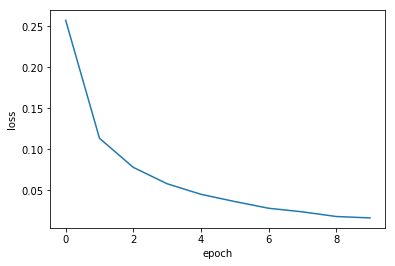

In [10]:
plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 정확도 평가

In [11]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

print('테스트 정확도: ', test_acc)
print('테스트 손실율: ', test_loss)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.0784 - acc: 0.9797
테스트 정확도:  0.9797
테스트 손실율:  0.07837926464056436


⚙️ 엔지니어

> 정확도가 97%가 나왔다!  
> 대충 만들었는데도 정확도가 상당히 높다.  
>
> 그런데  
> 훈련을 마친 정확도 99%보다 정확도가 떨어진다.  
>
> 이것은  
> 디자이너가  
> 피팅모델에 딱 맞게  
> 오버해서 옷을 만들어서 (over fitting)  
> 실제로 제품이 나왔을때  
> 일반인은 입지 못하는  
> 사태와 비슷하다.  
>
> 이것을 
> 훈련 세트에 **과대적합(Overfitting)** 되었다고 한다.  
>
> 과대적합(Overfitting)을 줄이는 방법  
> **제약(Regularization)** 과 **드랍아웃(Dropout)** 이 있다.  
> 나중에 알아보자  


## 해결 (Solution)

⚙️ 엔지니어  

> 보스~ 원하시는 솔루션입니다.    
> test_data에 원하시는 이미지를 입력하시면    
> 원하시는 결과값이 출력 됩니다.   

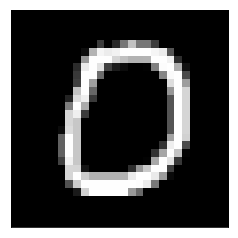

predicted digit is  0


In [19]:
def predict_handwrittendigits(x):
    x_data =(np.expand_dims(x, 0))
    predict = model.predict(x_data)
    return np.argmax(predict)

test_data = test_images[10]
result = predict_handwrittendigits(test_data)

plt.imshow(test_data, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()
print('predicted digit is ', result)